# Graded Challenge 3

# Introduction
Delfi Wardhani

H8 FTDS - 002

## Dataset Description
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The columns descriptions:
1. age : age
2. anaemia : decrease of red blood cells or hemoglobin
3. creatinine_phosphokinase : level of the CPK enzyme in the blood (mcg/L)
4. diabetes : if the patient has diabetes (boolean)
5. ejection_fraction : percentage of blood leaving the heart at each contraction (percentage)
6. high_blood_pressure : if the patient has hypertension (boolean)
7. platelets : platelets in the blood (kiloplatelets/mL)
8. serum_creatinine : level of serum creatinine in the blood (mg/dL)
9. serum_sodium : level off serum sodium in the blood (mEq/L)
10. sex : woman or man (binary)
11. smoking : if the patient smokes or not (boolean)
12. time : follow-up period (days)
13. DEATH_EVENT : if the patient deceased during the follow-up period (boolean)

## Objective
The objective in this project is to implement the Random Forest Classifier algorithm in predicting the death event of a patient with certain diseases. 

Then we also implement some kinds of boosting to the algorithm to get the best accuracy in predicting the class. 

All models that trained will be evaluated and compared with each other in order to know the best model algorithm that we could use for other dataset with the same pattern of values.

# Import Library

In [202]:
# loading dataset & EDA
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ensembling / boosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

# Data Loading

In [203]:
# Read csv file
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [204]:
# Show table dimension (rows & columns)
df.shape

(299, 13)

In [205]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The dataset contains 13 columns with 299 rows or values. All of them are numerical values.

# Data Cleaning

Checking on the dataset whether it has missing value or duplicated data, and handle them if any.

In [206]:
# Shows the sum of missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [207]:
# Shows the duplicated data
df.duplicated().sum()

0

In [208]:
# Rename a column for its difficult phrase in typing
df.rename(columns={'creatinine_phosphokinase':'creatinine_p'}, inplace=True)

No missing value and no duplicated data in the dataset. Now the dataset is ready to be explored

In [209]:
# Shows the preview of the dataset
df

,age,anaemia,creatinine_p,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Exploratory Data Analysis (EDA)

## Death Ratio on Patients with Their Congenital Disease
In this part, we would like to check the death ratios on patients with their disease and certain habit (like smoking). First, we grouped all patients with a certain disease, then we check if all of those patients are related to the death event. We can count the percentage of death event in those patients, if the value is high then there is a significant correlation between them.

### Death Ratio on Anaemia Patients

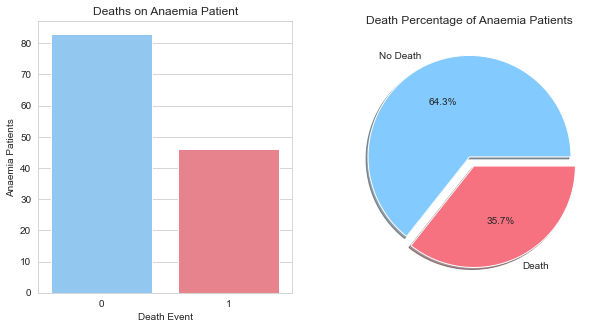

In [210]:
df1 = df.groupby('DEATH_EVENT')[['anaemia']].sum().reset_index()
plt.figure(figsize=(10,5))
colors = ["#82CAFF", "#F67280"]
labels=['No Death','Death']
explode=[0,0.1]


plt.subplot(1,2,1)
plt.title('Deaths on Anaemia Patient')
sns.barplot(data=df1, x='DEATH_EVENT', y='anaemia', palette=colors)
plt.ylabel('Anaemia Patients')
plt.xlabel('Death Event')

plt.subplot(1,2,2)
plt.title('Death Percentage of Anaemia Patients')
plt.pie(df1['anaemia'], autopct="%.1f%%", labels=labels, colors=colors, explode=explode, shadow=True)

plt.show()

The graph shows that only 35.7% of anaemia patients die. So there's a weak correlation between anaemia and death event.

### Death Ratio on Diabetes Patients

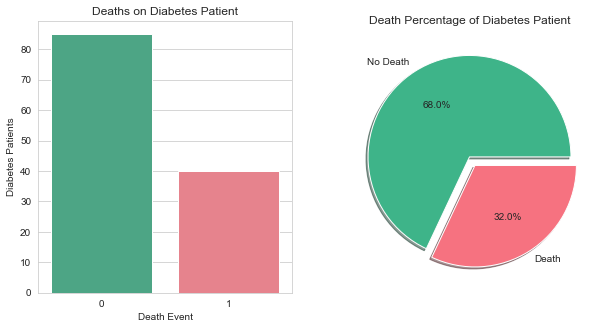

In [211]:
df2 = df.groupby('DEATH_EVENT')[['diabetes']].sum().reset_index()
plt.figure(figsize=(10,5))
colors = ["#3EB489", "#F67280"]
labels=['No Death','Death']
explode=[0,0.1]


plt.subplot(1,2,1)
plt.title('Deaths on Diabetes Patient')
sns.barplot(data=df2, x='DEATH_EVENT', y='diabetes', palette=colors)
plt.ylabel('Diabetes Patients')
plt.xlabel('Death Event')

plt.subplot(1,2,2)
plt.title('Death Percentage of Diabetes Patient')
plt.pie(df2['diabetes'], autopct="%.1f%%", labels=labels, colors=colors, explode=explode, shadow=True)

plt.show()

The graph shows that only 32% of diabetes patients die. So, there's a weak correlation between them.

### Death Ratio on Patients with High Blood Pressure

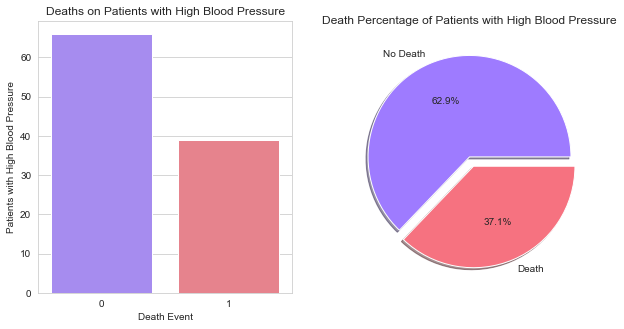

In [212]:
df3 = df.groupby('DEATH_EVENT')[['high_blood_pressure']].sum().reset_index()
plt.figure(figsize=(10,5))
colors = ["#9E7BFF", "#F67280"]
labels=['No Death','Death']
explode=[0,0.1]


plt.subplot(1,2,1)

plt.title('Deaths on Patients with High Blood Pressure')
sns.barplot(data=df3, x='DEATH_EVENT', y='high_blood_pressure', palette=colors)

plt.xlabel('Death Event')
plt.ylabel('Patients with High Blood Pressure')
plt.subplot(1,2,2)

plt.title('Death Percentage of Patients with High Blood Pressure')
plt.pie(df3['high_blood_pressure'], autopct="%.1f%%", labels=labels, colors=colors, explode=explode, shadow=True)

plt.show()

The graph shows only 37.1% of patients with high blood pressure die. So the correlation is weak as well.

### Death Ratio on Patients with Smoking Habit

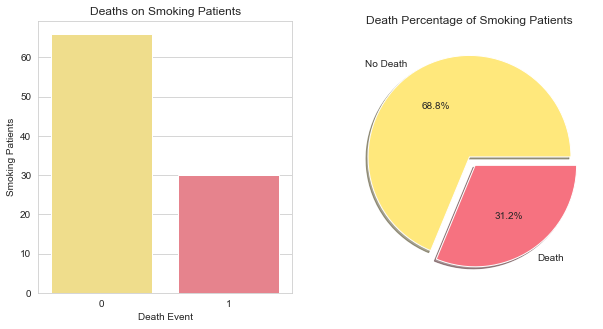

In [213]:
df4 = df.groupby('DEATH_EVENT')[['smoking']].sum().reset_index()
plt.figure(figsize=(10,5))
colors = ["#FFE87C", "#F67280"]
labels=['No Death','Death']
explode=[0,0.1]


plt.subplot(1,2,1)

plt.title('Deaths on Smoking Patients')
sns.barplot(data=df4, x='DEATH_EVENT', y='smoking', palette=colors)

plt.xlabel('Death Event')
plt.ylabel('Smoking Patients')
plt.subplot(1,2,2)

plt.title('Death Percentage of Smoking Patients')
plt.pie(df4['smoking'], autopct="%.1f%%", labels=labels, colors=colors, explode=explode, shadow=True)

plt.show()

The graph shows only 31.2% of patients with smoking habit die. This means a weak correlation as well.

## Heatmap Correlation Matrix
Now, let's see the correlation between all other features using the heatmap correlation chart

<AxesSubplot:title={'center':'Correlation Matrix'}>

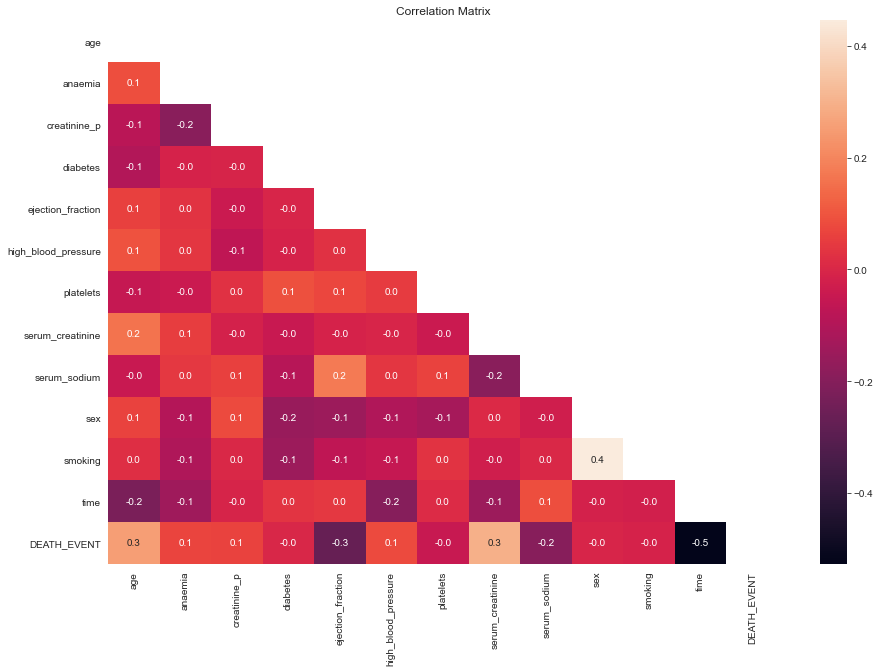

In [214]:
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot=True, fmt='.1f', mask=np.triu(df.corr()))  

From the graph above, we can select age, ejection_fraction, serum_creatinine, serum_sodium, and time to be the features that included in model training as they have the significant correlation with death_death event.

# Data Preprocessing

First, we prepare the dataset with the selected feature and the target column.

In [215]:
data = df.copy()
hapus = ['anaemia', 'creatinine_p', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking']
data.drop(hapus, axis=1, inplace=True)
data

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1
...,...,...,...,...,...,...
294,62.0,38,1.1,143,270,0
295,55.0,38,1.2,139,271,0
296,45.0,60,0.8,138,278,0
297,45.0,38,1.4,140,280,0


## Data Split

Next, we divide the dataset into two parts, 80% as data train and the rest as data test

In [237]:
y = data["DEATH_EVENT"]
X = data.drop('DEATH_EVENT',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
print("Jumlah data train : ", len(X_train))
print("Jumlah data test : ", len(X_test))

Jumlah data train :  239
Jumlah data test :  60


## Data Scaling

After splitting the data, we scale the data

In [217]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Definition

In this project, we use the **Random Forest Classifier** as the model to train the dataset.

Then we use other boosting algorithm in order to increase the accuracy of the prediction result, such as :
- **AdaBoost**
- **Gradient Boosting**
- **XGBoost**

# Model Training

The code below is a function with a model required as input to train the dataset, then calculate its accuracy and also the confusion matrix and classification report.

In [218]:
# Function for training and shows the evaluation
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("=================================================================================")
    print("TRAINING RESULTS: \n=================================================================================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred)*100:.2f}","%")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("=================================================================================")
    print("TESTING RESULTS: \n=================================================================================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred)*100:.2f}","%")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## Random Forest Classifier

In [225]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_leaf_nodes=16, max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
evaluate(rf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[161   5]
 [  8  65]]
ACCURACY SCORE:
94.56 %
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.952663   0.928571  0.945607    0.940617      0.945304
recall       0.969880   0.890411  0.945607    0.930145      0.945607
f1-score     0.961194   0.909091  0.945607    0.935142      0.945280
support    166.000000  73.000000  0.945607  239.000000    239.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[36  1]
 [ 8 15]]
ACCURACY SCORE:
85.00 %
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.818182   0.937500      0.85   0.877841       0.86392
recall      0.972973   0.652174      0.85   0.812573       0.85000
f1-score    0.888889   0.769231      0.85   0.829060       0.84302
support    37.000000  23.000000      0.85  60.000000      60.00000


By using the Random Forest Classifier, we get the accuracy on training data is 94.56% and 85% on test data. It might caused by the splitted data between training and testing data are not representing the whole dataset.

## Random Forest + AdaBoost Classifier

Now, we use additional boosting algorithm, which is AdaBoost Classifier along with the Random Forest Classifier as well to predict the death event.

In [226]:
rf_adaboost = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                                             max_leaf_nodes=16,
                                                                             n_estimators=100,
                                                                             random_state=42),
                                       
                                       n_estimators=200,
                                       learning_rate=0.1,
                                       algorithm='SAMME.R',
                                       random_state=42)
rf_adaboost.fit(X_train, y_train)
rfad_predicted = rf_adaboost.predict(X_test)
rfad_acc_score = accuracy_score(y_test, rfad_predicted)
evaluate(rf_adaboost, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[164   2]
 [  7  66]]
ACCURACY SCORE:
96.23 %
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.959064   0.970588  0.962343    0.964826      0.962584
recall       0.987952   0.904110  0.962343    0.946031      0.962343
f1-score     0.973294   0.936170  0.962343    0.954732      0.961955
support    166.000000  73.000000  0.962343  239.000000    239.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[36  1]
 [ 7 16]]
ACCURACY SCORE:
86.67 %
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.837209   0.941176  0.866667   0.889193      0.877063
recall      0.972973   0.695652  0.866667   0.834313      0.866667
f1-score    0.900000   0.800000  0.866667   0.850000      0.861667
support    37.000000  23.000000  0.866667  60.000000     60.000000


The accuracy on data test is slightly increased become 86.67% compared to the Random Forest only which is 85%.

## Gradient Boosting Classifier

Now, we try to use the Gradient Boosting Classifier to find out whether it will generate a better prediction / better accuracy.

In [227]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
grad_boost_clf.fit(X_train, y_train)
gb_predicted = grad_boost_clf.predict(X_test)
gb_acc_score = accuracy_score(y_test, gb_predicted)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[166   0]
 [  0  73]]
ACCURACY SCORE:
100.00 %
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    166.0  73.0       1.0      239.0         239.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[34  3]
 [ 6 17]]
ACCURACY SCORE:
85.00 %
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.850000      0.85   0.850000       0.85000
recall      0.918919   0.739130      0.85   0.829025       0.85000
f1-score    0.883117   0.790698      0.85   0.836907       0.84769
support    37.000000  23.000000      0.85  60.000000      60.00000


From the result above we can see the Gradient Boosting Classifier generated a better prediction on the data train, which is 100% accuracy. Unfortunately, the same thing didn't happen to the data test, it only get the accuracy of 85%. It might be caused by the overfitting or the unbalanced splitted dataset.

## XGBoost Classifier

Next, we try the other boosting algorithm, which is XGBoost Classifier.

In [228]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.3, n_jobs=-1)
xgb_clf.fit(X_train, y_train)
xgb_predicted = xgb_clf.predict(X_test)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAINING RESULTS: 
CONFUSION MATRIX:
[[166   0]
 [  0  73]]
ACCURACY SCORE:
100.00 %
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    166.0  73.0       1.0      239.0         239.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[34  3]
 [ 7 16]]
ACCURACY SCORE:
83.33 %
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.829268   0.842105  0.833333   0.835687      0.834189
recal

Unfortunately, this model generated the worse prediction on the dataset among the other models, which is the 83.33% on accuracy. Although, it reached the accuracy of 100% for the data train.

# Model Evaluation

Now, let's compare all the models used looking at its accuracy and the result of the confusion matrix (visualized by ROC curve)

## Accuracy Model

In [230]:
model_ev = pd.DataFrame({'Model': ['Random Forest','Random Forest + AdaBoost','Gradient Boost','XGBoost'], 
                         'Accuracy (%)': [rf_acc_score*100, rfad_acc_score*100, gb_acc_score*100, xgb_acc_score*100]})
model_ev

,Model,Accuracy (%)
0,Random Forest,85.000000
1,Random Forest + AdaBoost,86.666667
2,Gradient Boost,85.000000
3,XGBoost,83.333333


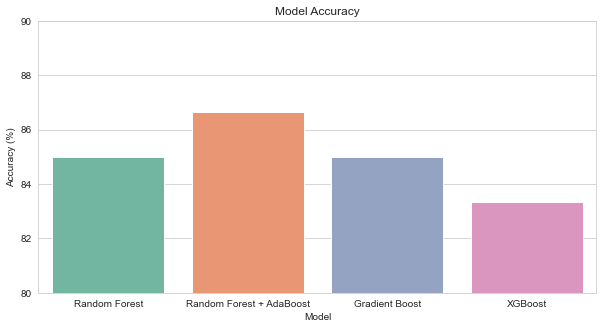

In [236]:
# Showing the bar chart
plt.figure(figsize=(10,5))
plt.title('Model Accuracy')
sns.barplot(data=model_ev, x='Model', y='Accuracy (%)', palette='Set2')
plt.ylim(80,90)
plt.show()

The combined algorithm of Random Forest and AdaBoost Classifier reached the best accuracy in predicting the death event.

## ROC Curve

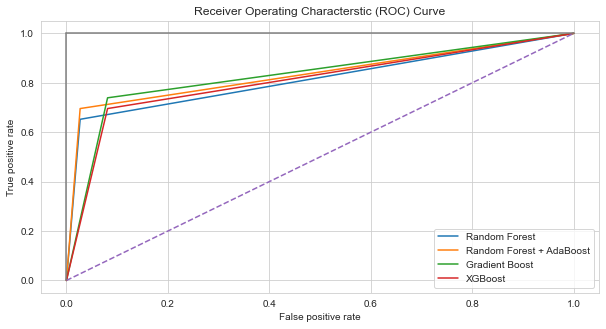

In [238]:
# Saving the confusion matrix result by using the roc_curve function
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
rfad_false_positive_rate,rfad_true_positive_rate,rfad_threshold = roc_curve(y_test,rfad_predicted)
gb_false_positive_rate,gb_true_positive_rate,gb_threshold = roc_curve(y_test,gb_predicted)

# Shows the visualization of the ROC Curve from each model
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characterstic (ROC) Curve')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(rfad_false_positive_rate,rfad_true_positive_rate,label='Random Forest + AdaBoost')
plt.plot(gb_false_positive_rate,gb_true_positive_rate,label='Gradient Boost')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='XGBoost')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

From the visualization above, we can see that it's not really obvious which model generates the best prediction. Each of them has their own strenghts and weaknesses. For example, the random forest and adaboost, they have better true positive rate, while the gradient boost and XGBoost have better (less) false positive rate.

# Model Inference

Now, we will try the trained model with new dataset with random values. We'd want to see the prediction of this new dataset that generated with the model that has been trained before.

In [256]:
dummy = pd.DataFrame()
dummy['a'] = np.random.randint(50, 75, 100)
dummy['ef'] = np.random.randint(20, 70, 100)
dummy['sc'] = np.random.uniform(0.1, 3.0, 100)
dummy['ss'] = np.random.randint(110, 150, 100)
dummy['t'] = np.random.randint(1, 300, 100)
dummy['target'] = np.random.randint(0,1,100)
dummy

,a,ef,sc,ss,t,target
0,60,64,2.662924,133,87,0
1,52,40,1.114729,118,238,0
2,61,28,1.250166,118,118,0
3,69,31,2.391445,121,238,0
4,61,63,1.375250,131,239,0
...,...,...,...,...,...,...
95,60,68,1.647956,140,119,0
96,72,47,1.916482,121,264,0
97,64,63,2.269904,121,21,0
98,69,31,1.013144,125,10,0


Preprocess the new dataset (dummy)

In [257]:
# Assign x and y value from dummy data
y_dum = dummy['target'].values 
X_dum = dummy.drop(columns=['target'],axis=1).values

# Scaling dummy data
scaler = StandardScaler()
X_dum = scaler.fit_transform(X_dum)

In [263]:
pred_dum = rf_adaboost.predict(X_dum)
diff_dum = pd.DataFrame({'Actual Value':y_dum,
                     'Predicted Value' :pred_dum
                    })
diff_dum

,Actual Value,Predicted Value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,1
98,0,1


The prediction is generated. The result is not 100% accurate between the predicted value and the actual value as the model trained could not reach the 100% accuracy as well.

# Conclusion

The congenital disease that carried by the patient is not affecting their death, so we used other features that have better correlation with the death event, which are :
- age
- ejection_fraction 
- serum_creatinine 
- serum_sodium
- time

We use the Random Forest Classifier to predict the death event, and we only get the 85% of accuracy. Then we add the AdaBoost Classifier to it, then the accuracy is slightly increased into 86.67%

We use other algorithm to be trained on the dataset, which are Gradient Boosting Classifier and XGBoost. Unfortunately we could only got 85% and 83.33% of accuracy in predicting the death event by using these 2 algorithms. However, these 2 models generate prediction with 100% accuracy on the data train. It might be caused by the splitted data between training and testing data are not representing the whole dataset so it became unbalanced.